In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [21]:
image=cv2.imread("dog.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)
plt.show()

In [22]:
image.shape

(300, 332, 3)

In [23]:
def add_noise(image, noise_factor=500):
    noisy_image = image+noise_factor*np.random.randn(*image.shape)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

noisy_image = add_noise(image)

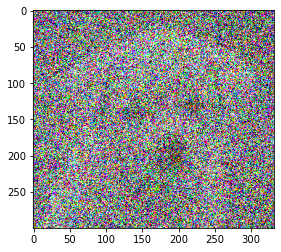

In [30]:
plt.imshow(noisy_image)
plt.show()


In [27]:
def arithmetic_mean_filter(image, kernel_size=3):
    height, width,color = image.shape
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    border = kernel_size//2
    
    for y in range(border, height - border):
        for x in range(border, width - border):
            window = image[y - border : y + border + 1, x - border : x + border + 1]
            avg = np.sum(window)
            filtered_image[y, x] = (avg).astype(image.dtype)
    return filtered_image


In [28]:
am = arithmetic_mean_filter(noisy_image)

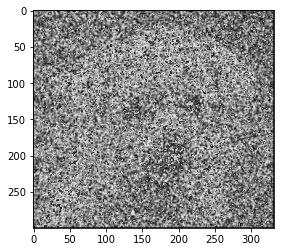

In [29]:
plt.imshow(am)
plt.show()

In [59]:
def geometric_mean_filter(image, kernel_size=3):
    height, width,color = image.shape
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    border = kernel_size//2
    
    for y in range(border, height - border):
        for x in range(border, width - border):
            window = image[y - border : y + border + 1, x - border : x + border + 1]
            geometric_mean = np.sum(window)
            filtered_image[y, x] = (geometric_mean**(1/kernel_size**2)).astype(image.dtype)
    return filtered_image

In [60]:
gm = geometric_mean_filter(noisy_image)

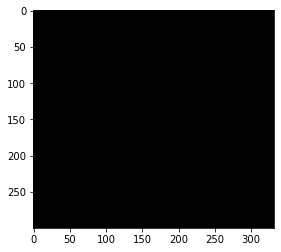

In [61]:
plt.imshow(gm)
plt.show()

In [127]:
def harmonic_mean_filter(image, kernel_size=3):
    height, width,color = image.shape
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    border = kernel_size//2
    
    for y in range(border, height - border):
        for x in range(border, width - border):
            window = image[y - border : y + border + 1, x - border : x + border + 1]
            harmonic_mean = kernel_size**2 / np.sum(1.0 / (window + 1e-6))
            filtered_image[y, x] = (harmonic_mean).astype(image.dtype)
    return filtered_image

In [128]:
hm = harmonic_mean_filter(noisy_image)

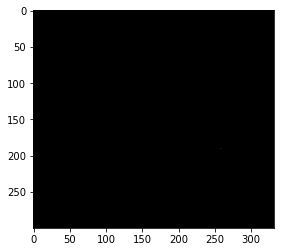

In [129]:
plt.imshow(hm)
plt.show()

In [163]:
def counter_harmonic_mean_filter(image, kernel_size=3, Q=1.5):
    height, width,color = image.shape
    filtered_image = np.zeros_like(image, dtype=np.uint8)
    border = kernel_size//2
    
    for y in range(border, height - border):
        for x in range(border, width - border):
            window = image[y - border : y + border + 1, x - border : x + border + 1]
            numerator = np.sum(np.power(window, Q+1))
            denominator = np.sum(np.power(window, Q))
            
            if denominator != 0:
                counter_harmonic_mean = numerator / denominator
            else:
                counter_harmonic_mean = 0
                
            filtered_image[y, x] = (counter_harmonic_mean).astype(image.dtype)
    return filtered_image

In [164]:
chm = counter_harmonic_mean_filter(noisy_image)

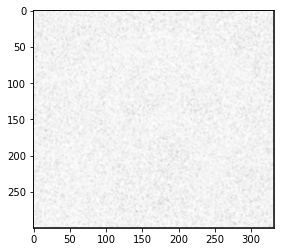

In [165]:
plt.imshow(chm)
plt.show()


In [ ]:
cv2.imshow('original image',image)
cv2.imshow('noisy image',noisy_image)
cv2.imshow('am image',am)
cv2.imshow('gm image',gm)
cv2.imshow('hm image',hm)
cv2.imshow('chm image',chm)

cv2.waitKey(0)
cv2.destroyAllWindows()